# Project 2

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

In [2]:
 data = pd.read_csv('dataTrain_carListings.zip')

In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.shape

(500000, 6)

In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

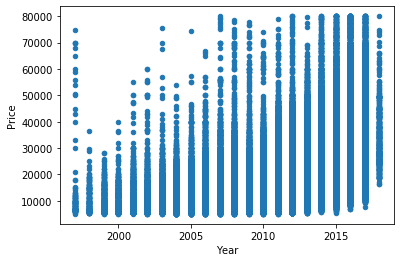

In [6]:
data.plot(kind='scatter', y='Price', x='Year')

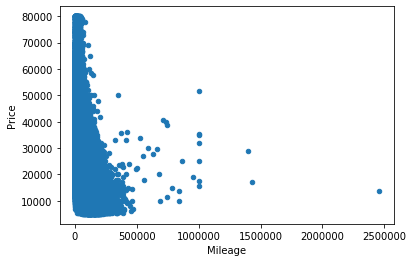

In [7]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [8]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the model using K-Fold (K=10) cross-validation
- 25% - Notebook explaining the modeling process


In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import math
import numpy as np
import random

In [8]:
data = pd.read_csv('dataTrain_carListings.zip')
data.head()
data.shape

(500000, 6)

In [9]:
y = data['Price'] 
X = data.drop(['Price'], axis=1)


In [37]:
X.head(2)

,Year,Mileage,State,Make,Model
0,2014,31909,MD,Nissan,MuranoAWD
1,2016,25741,KY,Chevrolet,CamaroCoupe


In [11]:
import category_encoders as ce
X_ = ce.BinaryEncoder().fit_transform(X)

In [38]:
X_.shape

(500000, 27)

In [13]:
X_.head(2)

,Year,Mileage,State_0,State_1,State_2,State_3,State_4,State_5,State_6,Make_0,...,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10
0,2014,31909,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2016,25741,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
y.shape

(500000,)

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
def ManualCrossValidation(model , kfold = 10):
    accuracy_scores = []
    
    for i in range(kfold):
        random_state = math.trunc((random.random() * 1000))
        X_foldtrain, X_foldtest, y_foldtrain, y_foldtest = train_test_split(X_, y, test_size=0.3, random_state=random_state)
        
        model.fit(X_foldtrain, y_foldtrain)
        y_pred_clf = model.predict(X_foldtest)
        error = mean_squared_error(y_foldtest, y_pred_clf) ** 0.5
        accuracy_scores.append(error)
        
    for i in range(len(accuracy_scores)):
        error = accuracy_scores[i] + error
    error = error / len(accuracy_scores)

    return error

In [144]:
#Validación de la función
Modelo = RandomForestRegressor(n_estimators=1, random_state=1, n_jobs=-1)
RMSE = ManualCrossValidation(Modelo)
RMSE

5532.328628660222

### n_estimator

In [146]:
estimator_range = range(1, 120, 30)

# list to store the average Accuracy for each value of n_estimators
rmse_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    Modelo = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    rmse_scores.append((ManualCrossValidation(Modelo)).mean())x|

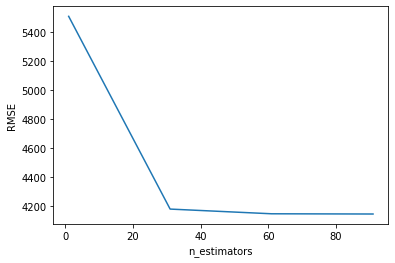

In [147]:
plt.plot(estimator_range , rmse_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE');

In [18]:
from sklearn.model_selection import train_test_split
estimator_range = range(20, 35, 5)

# list to store the average Accuracy for each value of n_estimators
mse_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    Modelo = RandomForestRegressor(n_estimators=estimator, random_state=1, n_jobs=-1)
    mse_scores.append((ManualCrossValidation(Modelo)).mean())

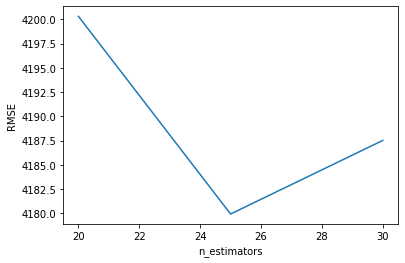

In [20]:
plt.plot(estimator_range , mse_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE');

In [26]:
min_Accuracy = np.min(mse_scores) 
min_Accuracy

4179.939235038009

### Depth

In [28]:
estimator_depth = range(1, 150, 50)

# list to store the average Accuracy for each value of n_estimators
rmse_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for depth in estimator_depth:
    Modelo = RandomForestRegressor(n_estimators=25, max_depth=depth, random_state=1, n_jobs=-1)
    rmse_scores.append((ManualCrossValidation(Modelo)).mean())

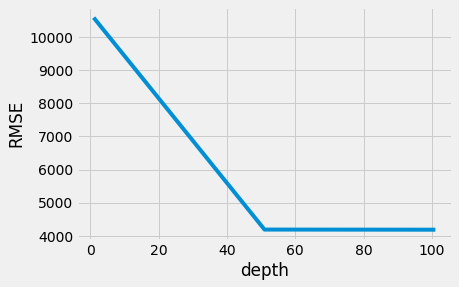

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.plot(estimator_depth , rmse_scores)
plt.xlabel('depth')
plt.ylabel('RMSE');

In [40]:
estimator_depth = range(30, 60, 5)

# list to store the average Accuracy for each value of n_estimators
rmse_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for depth in estimator_depth:
    Modelo = RandomForestRegressor(n_estimators=25, max_depth=depth, random_state=1, n_jobs=-1)
    rmse_scores.append((ManualCrossValidation(Modelo)).mean())

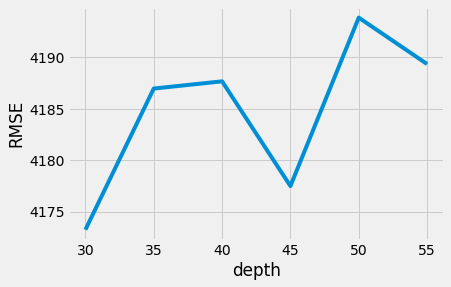

In [41]:
plt.style.use('fivethirtyeight')
plt.plot(estimator_depth , rmse_scores)
plt.xlabel('depth')
plt.ylabel('RMSE');

In [ ]:
#### La mejor estimación se da con 25 estimadores, y una profundidad de 45

In [42]:
estimator_depth = range(1, 21, 5)

# list to store the average Accuracy for each value of n_estimators
rmse_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for depth in estimator_depth:
    Modelo = RandomForestRegressor(n_estimators=25, max_depth=depth, random_state=1, n_jobs=-1)
    rmse_scores.append((ManualCrossValidation(Modelo)).mean())

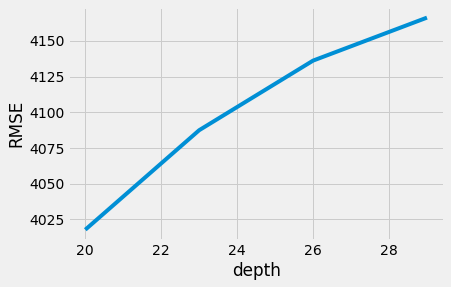

In [43]:
plt.style.use('fivethirtyeight')
plt.plot(estimator_depth , rmse_scores)
plt.xlabel('depth')
plt.ylabel('RMSE');

In [45]:
#X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=random_state)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.33, random_state=42)

clf = RandomForestRegressor(n_estimators=25,max_depth=45, random_state=1, n_jobs=-1)
clf.fit(X_train, y_train)
    

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=45, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [46]:
from sklearn.externals import joblib

C:\Users\DIANA DIAZ\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [48]:
joblib.dump(clf, 'price_clf.pkl', compress=3)

['price_clf.pkl']

In [ ]:
#y_pred_clf = clf.predict(X_test)

In [ ]:
error = mean_squared_error(y_test, y_pred_clf) ** 0.5
print('RMSE: %.3f' % error)